In [1]:
import numpy as np
import ticktack
from ticktack import fitting
import jax.numpy as jnp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
from tqdm import tqdm

In [2]:
model = 'Guttler14'
cbm = ticktack.load_presaved_model(model, production_rate_units = 'atoms/cm^2/s')
sf = fitting.SingleFitter(cbm, model, box="Troposphere", hemisphere="north")
sf.load_data("Sakurai20_CedarLw.csv", burnin_time=1000)
sf.compile_production_model(model="simple_sinusoid")
params = jnp.array([-660, 1./12, np.pi/2., 81./12])

INFO[2022-01-19 17:44:36,682]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-01-19 17:44:36,683]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Host Interpreter
INFO[2022-01-19 17:44:36,684]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
WARNING[2022-01-19 17:44:36,684]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
chain, sampler = sf.MarkovChainSampler(params, sf.log_joint_simple_sinusoid, burnin=500, production=1000, 
                           args=(jnp.array([-660-5, 1/365., -jnp.pi, 0., 0.]),
                                 jnp.array([-660+5, 5., jnp.pi, 15., 2.])
                                ))

Running burn-in...


100%|█████████████████████████████████████████| 500/500 [02:49<00:00,  2.95it/s]


Running production...


100%|███████████████████████████████████████| 1000/1000 [05:13<00:00,  3.18it/s]


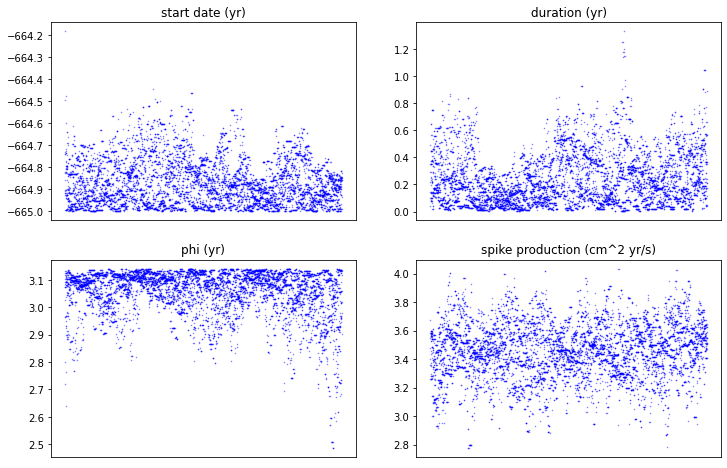

In [4]:
labels = ["start date (yr)", "duration (yr)", "phi (yr)", "spike production (cm^2 yr/s)"]
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axs = axs.flatten()
for i in range(chain.shape[1]):
    axs[i].plot(chain[:, i], 'b.', markersize=1, alpha=0.5)
    axs[i].set_title(labels[i])
    axs[i].get_xaxis().set_visible(False)

## Plot binned d14c

In [5]:
size = chain.shape[0]//10
d14cs_bin = np.zeros((size, sf.time_data.size))
for j in tqdm(range(size)):
    dc14 = sf.dc14(params=chain[::10][j, :])
    d14cs_bin[j, :] = dc14

100%|█████████████████████████████████████████| 800/800 [00:34<00:00, 23.25it/s]


100%|████████████████████████████████████████| 800/800 [00:02<00:00, 346.53it/s]


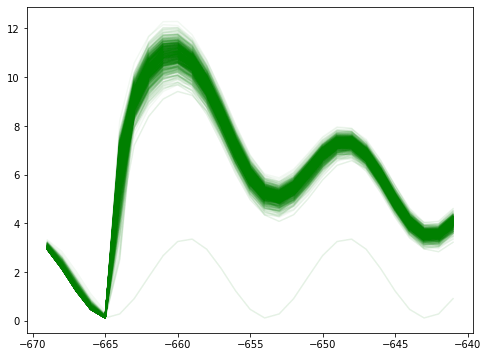

In [6]:
for d14c in tqdm(d14cs_bin):
    plt.plot(sf.time_data, d14c, 'g', alpha=0.05)

In [7]:
selected_chain = chain[(d14cs_bin[:, 9] < 5)] # select parameters that produce flat curves 
chain[(d14cs_bin[:, 19] > 9)]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 8000 but corresponding boolean dimension is 800

In [ ]:
sf.log_likelihood(param)

## Check the likelihood 

In [ ]:
i = 0
like = np.zeros((chain.shape[0],))
for param in tqdm(chain):
    like[i] = sf.log_likelihood(param)
    i +=1

In [ ]:
import jax, jaxlib, numpy, emcee, sys

In [ ]:
import jax, jaxlib, numpy, emcee, scipy, sys
print('jax',jax.__version__)
print('jaxlib',jaxlib.__version__)
print('numpy',numpy.__version__)
print('emcee',emcee.__version__)
print('scipy',scipy.__version__)
print('python',sys.version)